## Thiết kế các hạng mục hiếm

Giá trị hiếm là các hạng mục trong một biến hạng mục chỉ xuất hiện trong tỷ lệ nhỏ các quan sát. Không có quy tắc chung nào để xác định thế nào là tỷ lệ phần trăm nhỏ, nhưng thông thường, bất kỳ giá trị nào dưới 5% đều có thể coi là hiếm.


Như chúng ta đã thảo luận trong phần 3 của khóa học, các nhãn không thường xuất hiện rất ít, do đó rất khó để lấy được thông tin đáng tin cậy từ chúng. Nhưng quan trọng hơn, các nhãn không thường xuất hiện có xu hướng chỉ xuất hiện trên tập huấn luyện hoặc chỉ trên tập kiểm tra:


- Nếu chỉ trên tập huấn luyện, chúng có thể gây ra overfitting.
- Nếu chỉ trên tập kiểm tra, mô hình học máy sẽ không biết cách cho tính chúng

Do đó, để tránh cách xử lý này, chúng ta có xu hướng nhóm chúng vào một hạng mục mới là 'Rare' hoặc 'Other'.


Các nhãn hiếm có thể xuất hiện trong các biến có độ cardinal thấp hoặc cao. Không có quy tắc chung nào để xác định bao nhiêu nhãn khác nhau thì được coi là cardinality cao. Nó cũng phụ thuộc vào số lượng quan sát có trong tập dữ liệu. 100 nhãn trong tập dữ liệu với 1,000 quan sát có vẻ nhiều nhưng trong tập dữ liệu với 100,000 quan sát thì nó lại không cao.

Các biến có độ cardinal cao thường có nhiều hạng mục không thường xuất hiện hoặc hiếm, trong khi các biến có độ cardinal thấp chỉ có thể có 1 hoặc 2 nhãn hiếm.

### Lưu ý:

**Lưu ý rằng việc nhóm các nhãn hoặc hạng mục không thường xuất hiện vào một hạng mục mới là 'Rare' hoặc 'Other' là phương pháp phổ biến trong học máy dành cho doanh nghiệp.**

- Việc nhóm các hạng mục vào 'Rare' với các biến hiển thị cardinalty thấp có thể hoặc không thể cải thiện chất lượng mô hình; tuy nhiên, chúng ta thường nhóm lại chúng thành một hạng mục mới để triển khai mô hình trơn tru.

- Việc nhóm các hạng mục vào 'Rare' với các biến có cardinalty cao cũng có xu hướng cải thiện chất lượng của mô hình.


## Trong bản mô phỏng này:

Chúng ta sẽ tìm hiểu cách nhóm lại các nhãn hiếm trong một hạng mục mới là rare và so sánh ý nghĩa của mã hóa này trong các biến với:


- Một hạng mục nổi bật
- Ít hạng mục
- Cardinality cao

Chúng ta sẽ sử dụng tập dữ liệu giá nhà, nhóm lại các biến sử dụng pandas và feature-engine.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# chia tập dữ liệu
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None) # hiển thị tổng số cột có trong tập dữ liệu

## Tập dữ liệu giá nhà

In [3]:
# lload tập dữ liệu giá nhà

data = pd.read_csv('../lab6-13_dataset/house-price/houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Quan trọng

Việc xác định các nhãn hiếm chỉ nên được thực hiện bằng cách sử dụng tập huấn luyện, sau đó truyền sang tập kiểm tra. Chỉ nên xác định nhãn hiếm trong tập huấn luyện. Trên thực tế, chúng ta sẽ xác định **các nhãn không hiếm**, sau đó bất kỳ nhãn nào khác trong dữ liệu huấn luyện, kiểm tra hoặc dữ liệu trực tiếp trong tương lai không có trong danh sách **nhãn không hiếm** đó sẽ được nhóm thành hạng mục mới.

Ví dụ, giả sử chúng ta có biến 'city' với các nhãn 'London', 'Manchester' và 'Yorkshire' trong tập huấn luyện. 'Yorkshire' có mặt ít hơn 5% số lượng quan sát được, vì vậy chúng ta quyết định nhóm nó vào một hạng mục mới là 'Rare'.

Trong tập kiểm tra, chúng ta cũng nên thay thế 'Yorkshire' bằng 'Rare', bất kể tỷ lệ phần trăm quan sát cho 'Yorkshire' là bao nhiêu. Ngoài ra, nếu chúng ta tìm thấy hạng mục 'Milton Keynes' trong tập kiểm tra mà không có trong tập huấn luyện thì chúng ta cũng nên thay thế hạng mục đó bằng 'Rare'. Nói cách khác, tất cả các hạng mục có trong tập kiểm tra, không có trong danh sách các hạng mục **không hiếm** bắt nguồn từ tập huấn luyện sẽ được coi là giá trị hiếm và được nhóm lại thành 'Rare'. 

In [4]:
# let's divide into train and test set chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # các yếu tố dự báo
    data.SalePrice, # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

## Các biến có một hạng mục nổi trội

In [5]:
## Yêu cầu 1: khám phá các ví dụ mà biến chỉ có một vài hạng mục, giả sử nhỏ hơn 3

for col in X_train.columns:
    ## VIẾT CODE Ở ĐÂY:
    if X_train[col].dtypes == 'O':  # liệu có phải là biến hạng mục
        
        if X_train[col].nunique() < 3:  # liệu biến có ít hơn 3 hạng mục không
            
            # in % các quan sát trên mỗi hạng mục
            print(X_train.groupby(col)[col].count() / len(X_train))
            print()

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64

Alley
Grvl    0.029354
Pave    0.031311
Name: Alley, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

CentralAir
N    0.068493
Y    0.931507
Name: CentralAir, dtype: float64

PoolQC
Ex    0.000978
Gd    0.001957
Name: PoolQC, dtype: float64



### Kết luận

3 biến ở trên: Street, Utilities và CentralAir cho thấy một danh mục nổi trội, chiếm hơn 93-99% các quan sát. Nhóm lại nhãn hiếm trong tình huống này không có ý nghĩa gì. Chúng ta có thể xác định xem các biến này có hữu ích hay không với phân tích khám phá hoặc bất kỳ thuật toán lựa chọn đặc trưng nào hoặc loại bỏ hoàn toàn các biến.

## Các biến có ít hạng mục

In [6]:
# các cột trong list dưới chỉ có 4 nhãn khác nhau

cols = ['MasVnrType', 'ExterQual', 'BsmtCond']

for col in cols:
    
    print(X_train.groupby(col)[col].count() / len(X_train)) # tần số
    print()

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.595890
Stone      0.094912
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64



Các biến ở trên chỉ có 4 hạng mục, và trong cả ba trường hợp, có ít nhất một hạng mục là không thường xuất hiện, tức là có mặt trong ít hơn 5% các quan sát.

Khi biến chỉ có một vài hạng mục thì việc phân loại lại các nhãn hiếm thành một thứ khác không có ý nghĩa.


Ví dụ, biến MasVnrType đầu tiên chỉ hiển thị 1 nhãn hiếm: BrkCmn. Do đó, việc phân loại lại nó thành một nhãn mới sẽ khiến biến ở trong tình trạng tương tự.


Biến thứ hai - ExterQual chứa 2 nhãn hiếm là Ex và Fa, chúng ta có thể nhóm 2 nhãn này thành một nhãn mới là 'Rare'.


Biến thứ ba - BsmtCond chứa 3 nhãn hiếm là Fa, Gd và Po, vì vậy chúng ta có thể nhóm 3 nhãn này lại dưới nhãn mới 'Rare'. 

## Biến có cardinality cao

In [7]:
## Yêu cầu 2

# khám phá các ví dụ mà biến có một số hạng mục, chẳng hạn nhiều hơn 10

multi_cat_cols = []

for col in X_train.columns:
    ## VIẾT CODE Ở ĐÂY:
    if X_train[col].dtypes =='O': # nếu là biến hạng mục
    
        if X_train[col].nunique() > 10: #và có hơn 10 hạng mục
            
            multi_cat_cols.append(col)  # thêm vào list
            
            print(X_train.groupby(col)[col].count()/ len(X_train)) # và in ra % các quan sát trong từng hạng mục
            
            print()

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

<details><summary> Gợi ý </summary>

[nunique()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)

</details>

Chúng ta thấy nhiều hạng mục hiếm trong 3 biến hạng mục được in ở trên. Thực tế, chúng ta có thể vẽ biểu đồ của chúng bằng cách sử dụng code tương tự mà chúng ta đã học trong bài giảng về nhãn hiếm:

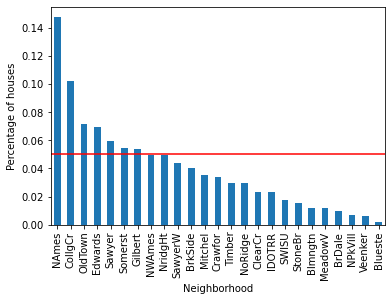

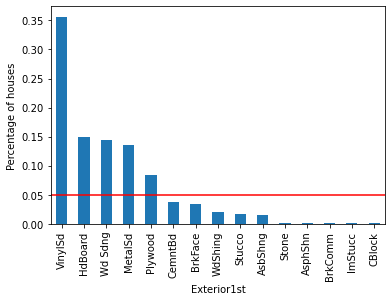

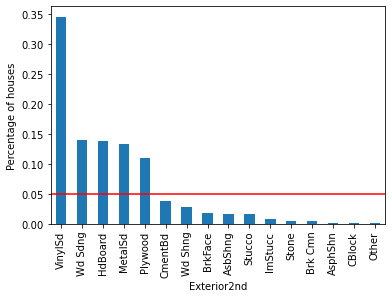

In [8]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # vẽ biểu đồ với % têrn
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # và thêm một đường ở 5% để gắn cờ ngưỡng cho các hạng mục hiếm
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

## Nhóm lại các nhãn hiếm với pandas

In [9]:
## Yêu cầu 3
def find_non_rare_labels(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    return non_rare

In [10]:
## Yêu cầu 4
# các nhãn không hiếm
## VIẾT CODE Ở ĐÂY:
find_non_rare_labels(X_train, 'Neighborhood', 0.05)

['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer', 'Somerst']

In [11]:
## Yêu cầu 5
# các nhãn hiếm

## VIẾT CODE Ở ĐÂY:
[x for x in X_train['Neighborhood'].unique() if x not in find_non_rare_labels(X_train, 'Neighborhood', 0.05)]

['ClearCr',
 'BrkSide',
 'SWISU',
 'Crawfor',
 'Mitchel',
 'Timber',
 'MeadowV',
 'BrDale',
 'NWAmes',
 'NridgHt',
 'SawyerW',
 'NoRidge',
 'IDOTRR',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'Veenker',
 'Blueste']

In [12]:
## Yêu cầu 6
def rare_encoding(X_train, X_test, variable, tolerance):
    ## VIẾT CODE Ở ĐÂY:
    X_train = X_train.copy()
    X_test = X_test.copy()

    # tìm hạng mục thường xuất hiện nhất
    ## VIẾT CODE Ở ĐÂY:
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # nhóm lại các nhãn hiếm
    ## VIẾT CODE Ở ĐÂY:
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [13]:
# Yêu cầu 7
for variable in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    ## VIẾT CODE Ở ĐÂY:
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

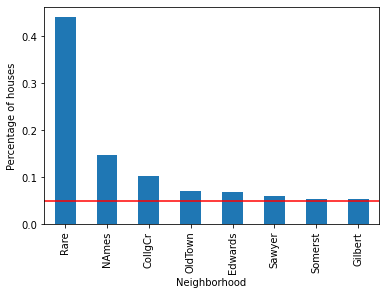

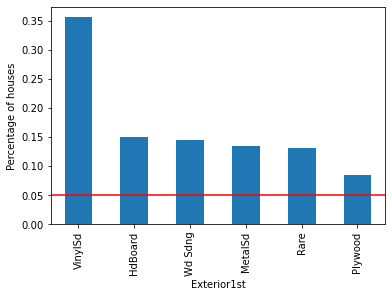

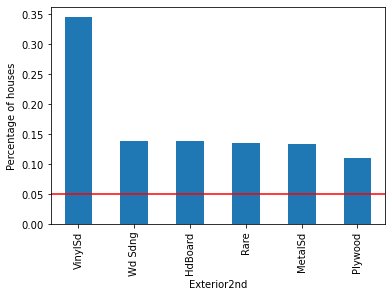

In [14]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # vẽ biểu đồ với % trên
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # và thêm một đường ở 5% để gắn cờ ngưỡng cho các hạng mục hiếm
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

Giờ hãy mã hóa các biến có độ cardinal thấp.

In [16]:
## Yêu cầu 8
for col in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    ## VIẾT CODE Ở ĐÂY:
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

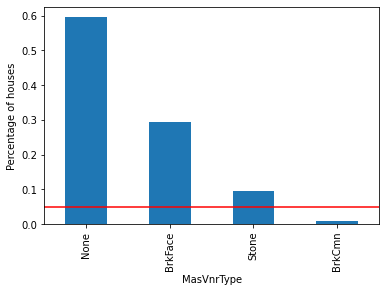

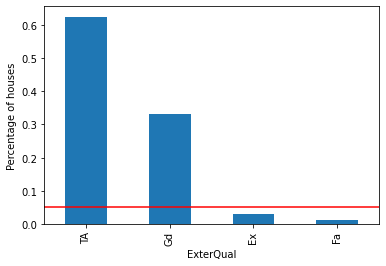

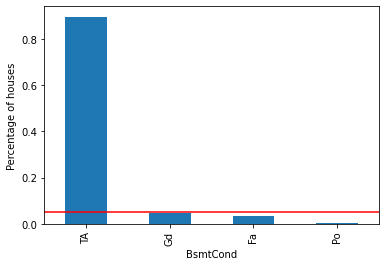

In [17]:
for col in ['MasVnrType', 'ExterQual', 'BsmtCond']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # vẽ biểu đồ với % trên
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # và thêm một đường ở 5% để gắn cờ ngưỡng cho các hạng mục hiếm
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

## Mã hóa nhãn hiếm với Feature-Engine

In [18]:
from feature_engine.encoding import RareLabelEncoder

In [19]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # các yếu tố dự báo
    data.SalePrice, # mục tiêu
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [20]:
# Rare encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # % tối thiểu được coi là không hiếm
    n_categories=4, # số lượng hạng mục tối thiểu mà biến có để nhóm lại thành các hạng mục chiếm
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'ExterQual', 'BsmtCond'] # các biến để nhóm lại
)  

In [21]:
rare_encoder.fit(X_train.fillna('Missing'))

/Users/ngohongthai/Documents/projects/tensorflow-env/env/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:174: UserWarning: The number of unique categories for variable ExterQual is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


RareLabelEncoder(n_categories=4,
                 variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
                            'MasVnrType', 'ExterQual', 'BsmtCond'])

Lưu ý: encoder cảnh báo chúng ta rằng biến **ExterQual** chứa ít hơn 4 hạng mục nên các hạng mục sẽ không được nhóm lại trong Rare kể cả khi % quan sát nhỏ hơn 0.05.

In [22]:
rare_encoder.variables_

['Neighborhood',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'BsmtCond']

In [23]:
# encoder_dict_ là một dictionary của biến: các cặp nhãn thường xuất hiện
rare_encoder.encoder_dict_

{'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Sawyer', 'Somerst',
        'Gilbert'],
       dtype='object'),
 'Exterior1st': Index(['VinylSd', 'HdBoard', 'Wd Sdng', 'MetalSd', 'Plywood'], dtype='object'),
 'Exterior2nd': Index(['VinylSd', 'Wd Sdng', 'HdBoard', 'MetalSd', 'Plywood'], dtype='object'),
 'MasVnrType': Index(['None', 'BrkFace', 'Stone'], dtype='object'),
 'ExterQual': array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object),
 'BsmtCond': Index(['TA'], dtype='object')}

In [24]:
X_train = rare_encoder.transform(X_train.fillna('Missing'))
X_test = rare_encoder.transform(X_test.fillna('Missing'))